In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

%matplotlib inline

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = load_iris()
x_data = data.data
y_data = data.target

In [3]:
pd.DataFrame(x_data, columns=data.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
pd.DataFrame(y_data).head()

,0
0,0
1,0
2,0
3,0
4,0


In [5]:
scaler = MinMaxScaler()
x_data = scaler.fit_transform(x_data)
pd.DataFrame(x_data, columns=data.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [6]:
_x = tf.placeholder(shape=[None, 4], dtype=tf.float32)
_y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
_w = tf.Variable(tf.truncated_normal([4, 1]), dtype=tf.float32)
_b = tf.Variable(tf.zeros([1]), dtype=tf.float32)
prediction = tf.matmul(_x, _w) + _b
loss = tf.reduce_mean(tf.square(_y-prediction))
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [7]:
feedDictTest = {_x: x_data, _y: np.transpose([y_data])}
batchSize = 15
epochs = 3000

ls = []
ws = []
bs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    prePred = sess.run([prediction], feed_dict=feedDictTest)
    
    for _ in tqdm(range(epochs)):
        currentBatch = 0
        while currentBatch < len(x_data):
            batchX = x_data[currentBatch:currentBatch+batchSize]
            batchY = y_data[currentBatch:currentBatch+batchSize]
            currentBatch += batchSize

            sess.run([optimizer], feed_dict={_x: batchX, _y: np.transpose([batchY])})

        l, w, b = sess.run([loss, _w, _b], feed_dict=feedDictTest)
        ls.append(l)
        ws.append(w)
        bs.append(b)

#         if _ % 100 == 0:
#             print('Epoch ', _)
#             print('Loss: {}\nW: {}\nB: {}\n\n'.format(l, w, b))
            
    print('Epoch ', epochs)
    print('Loss: {}\nW: {}\nB: {}\n\n'.format(l, w, b))
    
    postPred = sess.run([prediction], feed_dict=feedDictTest)

100%|██████████| 3000/3000 [00:18<00:00, 166.36it/s]

Epoch  3000
Loss: 0.05828743800520897
W: [[ 0.21204244]
 [-0.43343374]
 [ 1.7404482 ]
 [ 0.6040702 ]]
B: [0.01170748]




Text(0,0.5,'Loss')

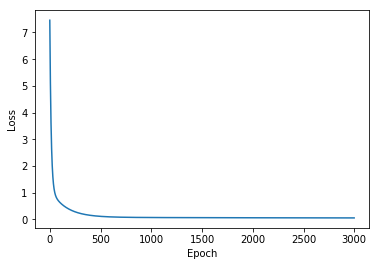

In [8]:
plt.plot(range(epochs), ls)
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0,0.5,'Weight[0]')

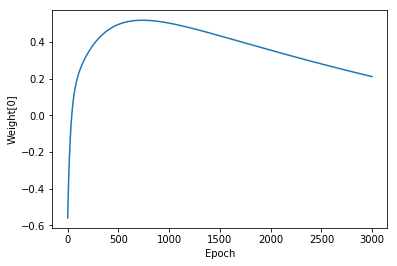

In [9]:
plt.plot(range(epochs), np.array(ws)[:, 0])
plt.xlabel('Epoch')
plt.ylabel('Weight[0]')

Text(0,0.5,'Bias')

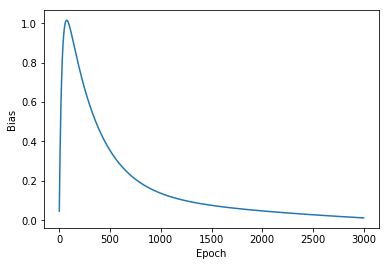

In [10]:
plt.plot(range(epochs), np.array(bs).reshape(-1))
plt.xlabel('Epoch')
plt.ylabel('Bias')